<a href="https://colab.research.google.com/github/KratiMaheshwari09/DEMO/blob/main/Notebooks/mpox-resnet50_krati.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers import RandomFlip
import tensorflow.keras.layers as tfl
import seaborn as sns
from PIL import Image

In [3]:
dataset_path = '/content/drive/MyDrive/Original_MonkeyPox_Dataset'

In [4]:
import os

if not os.path.exists(dataset_path):
    raise FileNotFoundError(f"The directory {dataset_path} does not exist. Please check the dataset path.")

print("Contents of the dataset directory:")
print(os.listdir(dataset_path))

Contents of the dataset directory:
['Monkeypox_Dataset_metadata.csv', 'Original Images', 'Fold1', 'Augmented Images']


In [5]:
train_path = os.path.join(dataset_path, 'Fold1/Train')
test_path = os.path.join(dataset_path, 'Fold1/Test')

In [6]:
train_path, test_path

('/content/drive/MyDrive/Original_MonkeyPox_Dataset/Fold1/Train',
 '/content/drive/MyDrive/Original_MonkeyPox_Dataset/Fold1/Test')

In [7]:
train_images = os.listdir(train_path)
for folder in train_images :
    images = os.listdir(train_path +'/'+ str(folder))
    print(folder)

Others
Monkeypox


Others


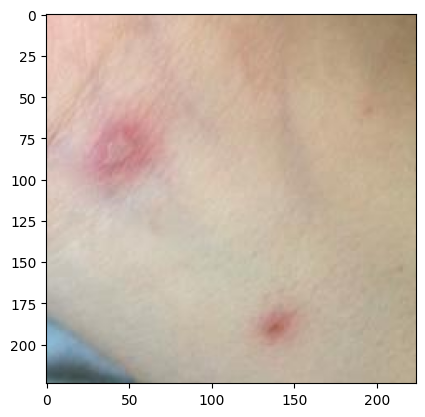

Monkeypox


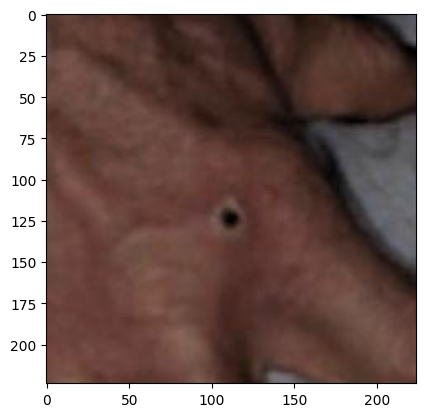

In [8]:
train_images = os.listdir(train_path)
for folder in train_images :
    images = os.listdir(train_path +'/'+ str(folder))
    print(folder)
    img = mpimg.imread(train_path +'/'+ str(folder) +'/'+images[7])
    imgplot = plt.imshow(img)
    plt.show()

In [9]:
def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']
  epochs = range(len(history.history['loss']))
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend()

In [10]:
Accuracy = {}

Loading the Training Dataset

In [11]:
labels = os.listdir(train_path)

img_size = 224
train_dataset = image_dataset_from_directory(
    '/content/drive/MyDrive/Original_MonkeyPox_Dataset/Fold1/Train',
    image_size = (img_size,img_size),
    batch_size = 32,
    shuffle=True,
    labels='inferred',
    class_names = labels,
    label_mode = 'binary',
    color_mode='rgb',
    validation_split = 0.3,
    subset='training',
    seed=22
)

Found 2142 files belonging to 2 classes.
Using 1500 files for training.


In [12]:
val_dataset = image_dataset_from_directory(
    '/content/drive/MyDrive/Original_MonkeyPox_Dataset/Fold1/Val',
    image_size = (img_size,img_size),
    batch_size = 32,
    shuffle=False,
    labels='inferred',
    class_names = labels,
    label_mode = 'binary',
    color_mode='rgb',
    validation_split = 0.3,
    subset='validation',
    seed=22
)

Found 420 files belonging to 2 classes.
Using 126 files for validation.


In [13]:
data_augmentation = tf.keras.Sequential([
    tfl.RandomFlip('horizontal_and_vertical'),
    tfl.RandomRotation(0.2),
    tfl.RandomZoom(0.2),
    tfl.RandomContrast(0.2)
])

def get_model(base, preprocessor, img_size):
    inputs = tf.keras.Input(shape=(img_size, img_size, 3))
    x = data_augmentation(inputs)
    x = preprocessor(x)
    x = base(x)
    x = tfl.Flatten()(x)
    x = tfl.Dense(1024, activation='relu')(x)
    x = tfl.BatchNormalization()(x)
    x = tfl.Dropout(0.5)(x)
    x = tfl.Dense(512, activation='relu')(x)
    x = tfl.BatchNormalization()(x)
    x = tfl.Dropout(0.5)(x)
    outputs = tfl.Dense(1, activation='sigmoid')(x)
    model = tf.keras.Model(inputs, outputs)
    return model

preprocess_input = tf.keras.applications.resnet.preprocess_input
pre_trained_model = tf.keras.applications.ResNet50(input_shape=(img_size, img_size, 3),
                                                    include_top=False,
                                                    weights='imagenet')
pre_trained_model.trainable = True
for layer in pre_trained_model.layers[:140]:
    layer.trainable = False

model = get_model(pre_trained_model, preprocess_input, img_size)
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10 ** (-epoch / 20))

history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=20,
    callbacks=[lr_schedule],
    verbose=1
)


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Epoch 1/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 273s 5s/step - accuracy: 0.6753 - loss: 0.8308 - val_accuracy: 0.4286 - val_loss: 63.5450 - learning_rate: 0.0010
Epoch 2/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 16s 263ms/step - accuracy: 0.8453 - loss: 0.4468 - val_accuracy: 0.4206 - val_loss: 5.7576 - learning_rate: 8.9125e-04
Epoch 3/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 266ms/step - accuracy: 0.8831 - loss: 0.3020 - val_accuracy: 0.7302 - val_loss: 1.1568 - learning_rate: 7.9433e-04
Epoch 4/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 13s 269ms/step - accuracy: 0.8957 - loss: 0.2538 - val_accuracy: 0.5238 - val_loss: 3.1002 - learning_rate: 7.0795e-04
Epoch 5/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 13s 272ms/step - accuracy: 0.9200 - loss: 0.2320 - val_accuracy: 0.5238 - val_loss: 1.8953 - learning_rate: 6.3096e-04
Epoch 6/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 13s 272ms/step - accuracy: 0.9471 - loss: 0.1552 - val_accuracy: 0.8175 - val_loss: 0.6842 - learning_rate: 5.6234e-04
Epoch 7/20
4

In [13]:

def get_model(base, preprocessor, img_size):
    inputs = tf.keras.Input(shape=(img_size,img_size,3))
    x = RandomFlip('horizontal')(inputs)
    x = preprocessor(x)
    x = base(x)
    x = tfl.Flatten()(x)
    x = tfl.Dense(1024, activation='relu')(x)
    x = tfl.BatchNormalization()(x)
    x = tfl.Dense(512, activation='relu')(x)
    x = tfl.BatchNormalization()(x)
    x = tfl.Dense(128, activation='relu')(x)
    x = tfl.Dropout(0.15)(x)
    x = tfl.BatchNormalization()(x)
    x = tfl.Dense(64, activation='relu')(x)
    x = tfl.Dropout(0.3)(x)
    x = tfl.BatchNormalization()(x)
    outputs = tfl.Dense(1, activation='sigmoid')(x)
    model = tf.keras.Model(inputs, outputs)
    return model


In [14]:
preprocess_input = tf.keras.applications.resnet.preprocess_input
pre_trained_model = tf.keras.applications.ResNet50(input_shape=(img_size,img_size,3),
                                         include_top=False,
                                         weights='imagenet')
pre_trained_model.trainable = False
model = get_model(pre_trained_model, preprocess_input, img_size)


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [15]:
model.compile(
    optimizer='adam',
    loss = 'binary_crossentropy',
    metrics=['accuracy']
)


In [16]:
history = model.fit(train_dataset,
                    validation_data=val_dataset,
                    epochs=10,
                    verbose=1)

Epoch 1/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 409s 8s/step - accuracy: 0.7259 - loss: 0.5833 - val_accuracy: 1.0000 - val_loss: 0.0372
Epoch 2/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 430s 8s/step - accuracy: 0.8945 - loss: 0.2616 - val_accuracy: 0.6905 - val_loss: 0.5648
Epoch 3/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 432s 8s/step - accuracy: 0.9332 - loss: 0.1476 - val_accuracy: 0.5159 - val_loss: 1.4039
Epoch 4/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 396s 8s/step - accuracy: 0.9556 - loss: 0.1196 - val_accuracy: 0.5714 - val_loss: 1.3281
Epoch 5/10
35/47 ━━━━━━━━━━━━━━━━━━━━ 1:28 7s/step - accuracy: 0.9693 - loss: 0.0836

KeyboardInterrupt: 

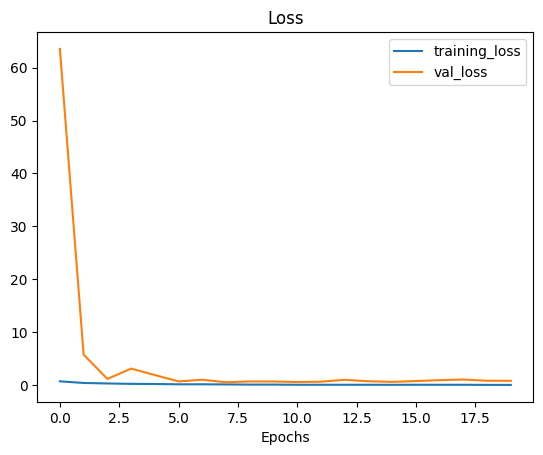

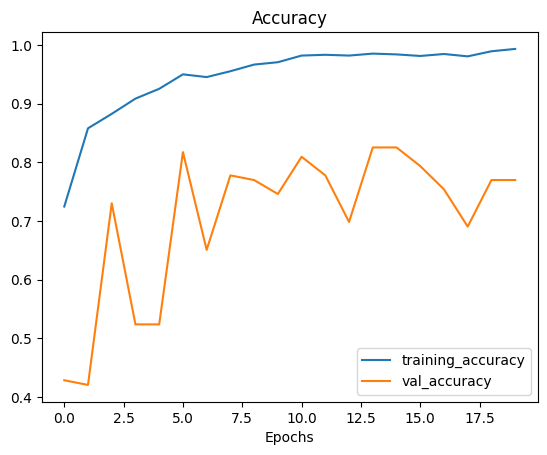

In [14]:
plot_loss_curves(history)

In [15]:
tf.keras.utils.plot_model(model, to_file='resnet50.png',expand_nested=True,show_shapes=True)


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.546745 to fit



In [16]:
Accuracy['ResNet'] = history.history['accuracy'][-1]

In [17]:
# Calculate the Loss and Accuracy on the Validation Data
test_loss, test_acc = model.evaluate(val_dataset)
print('test accuracy : ', test_acc)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 133ms/step - accuracy: 0.7934 - loss: 0.6625
test accuracy :  0.7698412537574768


In [ ]:
model.save('resnet50.h5')